# Few Shot Script 

#### Author : Advaith Shankar

General Information : Make sure you've set up ollama on your local and downloaded the specific model you want to run from the ollama platform using terminal

In [1]:
import pandas as pd
import ollama 
import os

In [2]:
ollama.pull('') #Specify the llm model on your local. For example in this case it was 'llava:13b'

ProgressResponse(status='success', completed=None, total=None, digest=None)

# For Apples

### Few Shot Examples For providing context to the model

In [4]:
examples = [
    {
        'role': 'user',
        'content': 'Bad apple',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.17.25 PM.png']
    },

    {
        'role': 'user',
        'content': 'Bad apple',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.17.15 PM.png']
    },
    
    {
        'role': 'user',
        'content': 'Good apple',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png']
    },


     {
        'role': 'user',
        'content': 'Good apple',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 4.59.44 PM.png']
    },
    

     {
        'role': 'user',
        'content': 'Bad apple',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenapples/rotated_by_45_Screen Shot 2018-06-08 at 2.51.09 PM.png']
    },

    {
        'role': 'user',
        'content': 'Good apple',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.02.24 PM.png']
    },


    {
        'role': 'user',
        'content': 'Good apple',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.11.41 PM.png']
    },


     {
        'role': 'user',
        'content': 'Good apple',
        'image': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.11.41 PM.png']
    },

    {
        'role': 'user',
        'content': 'Bad apple',
        'image': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.06.51 PM.png']
    },


    
    {
        'role': 'user',
        'content': 'Bad apple',
        'image': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-08 at 2.26.44 PM.png']
    },
    
]

## Testing for Classification

### Loading Testing dataset folder - Bad Apples

In [16]:
image_folder = '' #Specify path name with all images 

In [17]:
image_paths = [
    os.path.join(image_folder, filename)
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
]

In [18]:
results = []
for image_path in image_paths:
    task = {
        'role': 'user',
        'content': 'Based on all the context being provided and your knowledge, classify this image as whether the apple is a good apple or a bad apple. I want the response only to be good apple or bad apple, Nothing more than that.',
        'images': [image_path]
    }
    messages = examples + [task]

    
    response = ollama.chat(
        model='', #Specify Model Name here as well
        messages=messages,
        keep_alive=10
    )

    
    classification = response['message']['content'].strip()
    results.append({'image': image_path, 'classification': classification})


for result in results:
    print(f"Image: {result['image']} -> Classification: {result['classification']}\n")

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenapples/rotated_by_60_Screen Shot 2018-06-08 at 2.35.25 PM.png -> Classification: Bad apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenapples/saltandpepper_Screen Shot 2018-06-08 at 2.36.23 PM.png -> Classification: Bad apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenapples/rotated_by_15_Screen Shot 2018-06-08 at 2.46.44 PM.png -> Classification: Good apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenapples/rotated_by_45_Screen Shot 2018-06-08 at 2.46.36 PM.png -> Classification: Good apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenapples/vertical_flip_Screen Shot 2018-06-07 at 2.15.50 PM.png -> Classification: Bad 

### Creating DataFrame for visualizing results

In [19]:
df_results = pd.DataFrame(results)

### Bar Chart

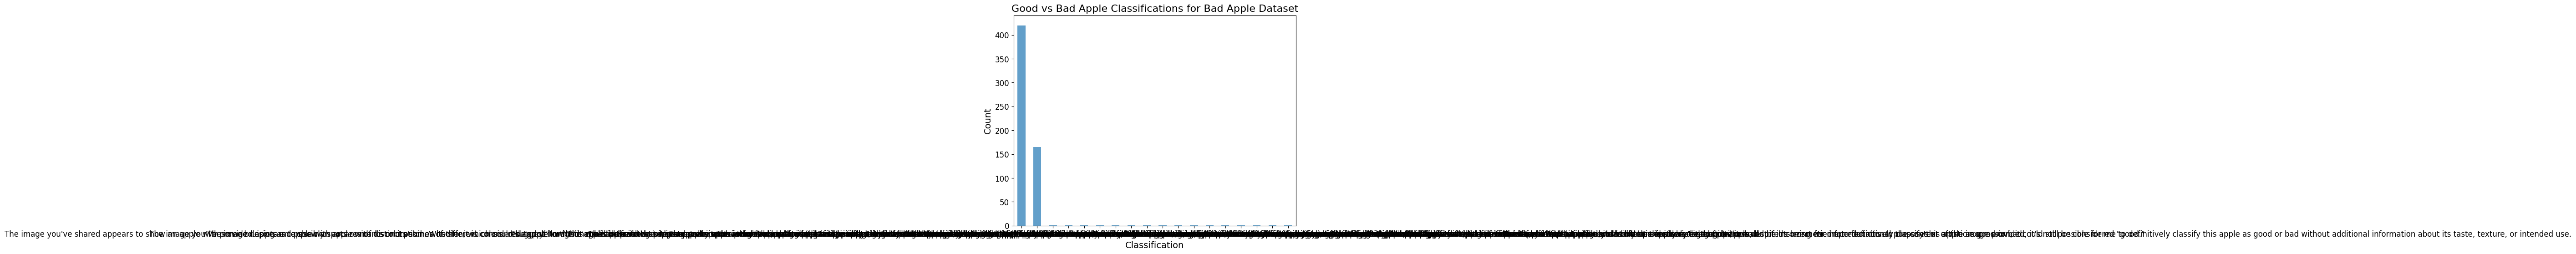

In [20]:
import matplotlib.pyplot as plt

# Count the number of "Good apple" and "Bad apple" classifications
classification_counts = df_results['classification'].value_counts()

# Plot the data as a bar chart
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar', alpha=0.7)

# Customize the plot
plt.title('Good vs Bad Apple Classifications for Bad Apple Dataset', fontsize=16)
plt.xlabel('Classification', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

### Confusion Matrix 

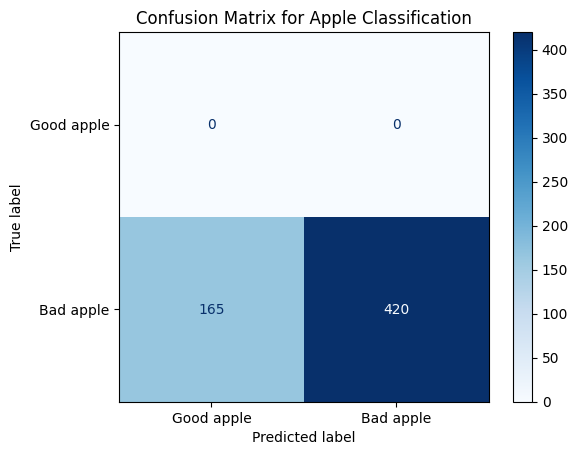

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the true labels (all "Bad apple")
true_labels = ["Bad apple"] * len(df_results)

# Extract the predicted labels from the DataFrame
predicted_labels = df_results['classification'].tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["Good apple", "Bad apple"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good apple", "Bad apple"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add a title
plt.title("Confusion Matrix for Apple Classification")
plt.show()

### Loading Testing dataset folder - Good Apples

In [22]:
image_folder = '/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshapples'

In [23]:
image_paths = [
    os.path.join(image_folder, filename)
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
]

In [24]:
results = []
for image_path in image_paths:
    task = {
        'role': 'user',
        'content': 'Based on all the context being provided and your knowledge, classify this image as whether the apple is a good apple or a bad apple. I want the response only to be good apple or bad apple (like a binary classification), Nothing more than that.',
        'images': [image_path]
    }
    messages = examples + [task]

    
    response = ollama.chat(
        model='', #Specify Model Name here as well
        messages=messages,
        keep_alive=10
    )

    
    classification = response['message']['content'].strip()
    results.append({'image': image_path, 'classification': classification})


for result in results:
    print(f"Image: {result['image']} -> Classification: {result['classification']}\n")

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.02.43 PM.png -> Classification: Good apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshapples/saltandpepper_Screen Shot 2018-06-08 at 5.10.11 PM.png -> Classification: Good apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshapples/rotated_by_30_Screen Shot 2018-06-08 at 5.26.41 PM.png -> Classification: Good apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.28.59 PM.png -> Classification: Good apple

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.02.54 PM.png -> Classification: The apple in the imag

In [26]:
df_results = pd.DataFrame(results)

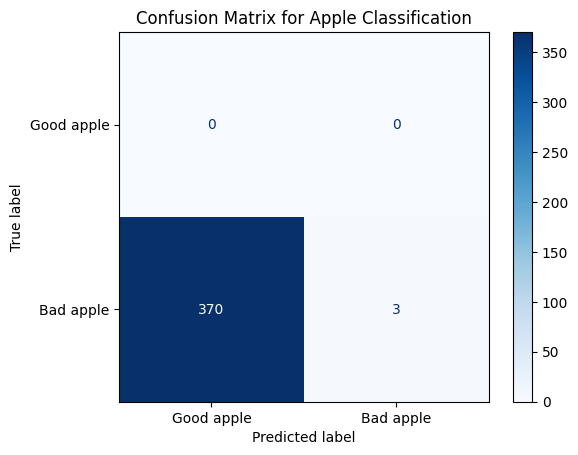

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the true labels (all "Bad apple")
true_labels = ["Bad apple"] * len(df_results)

# Extract the predicted labels from the DataFrame
predicted_labels = df_results['classification'].tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["Good apple", "Bad apple"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good apple", "Bad apple"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add a title
plt.title("Confusion Matrix for Apple Classification")
plt.show()

<br>

# For Oranges

### Few Shot Examples for providing context to the model

In [3]:
examples = [
    {
        'role': 'user',
        'content': 'Bad orange',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.18.41 PM.png']
    },

    {
        'role': 'user',
        'content': 'Bad orange',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.19.37 PM.png']
    },
    
    {
        'role': 'user',
        'content': 'Good orange',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.52.51 PM.png']
    },


     {
        'role': 'user',
        'content': 'Good orange',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.52.16 PM.png']
    },
    

     {
        'role': 'user',
        'content': 'Bad orange',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.28.28 PM.png']
    },

    {
        'role': 'user',
        'content': 'Good orange',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.58.28 PM.png']
    },


    {
        'role': 'user',
        'content': 'Good orange',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshoranges/rotated_by_15_Screen Shot 2018-06-13 at 12.10.27 AM.png']
    },


     {
        'role': 'user',
        'content': 'Good orange',
        'image': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshoranges/rotated_by_30_Screen Shot 2018-06-12 at 11.53.17 PM.png']
    },

    {
        'role': 'user',
        'content': 'Bad orange',
        'image': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.32.21 PM.png']
    },


    
    {
        'role': 'user',
        'content': 'Bad orange',
        'image': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.38.19 PM.png']
    },
    
]

## Test for Classification

### Loading Testing dataset folder - Bad Oranges

In [6]:
image_folder = '/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenoranges'

In [7]:
image_paths = [
    os.path.join(image_folder, filename)
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
]

In [8]:
results = []
for image_path in image_paths:
    task = {
        'role': 'user',
        'content': 'Based on all the context being provided and your knowledge, classify this image as whether the orange is a good orange or a bad orange. I want the response only to be good orange or bad orange (like a binary classification), Nothing more than that.',
        'images': [image_path]
    }
    messages = examples + [task]

    
    response = ollama.chat(
        model='', #Specify Model Name here as well
        messages=messages,
        keep_alive=10
    )

    
    classification = response['message']['content'].strip()
    results.append({'image': image_path, 'classification': classification})


for result in results:
    print(f"Image: {result['image']} -> Classification: {result['classification']}\n")

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenoranges/rotated_by_75_Screen Shot 2018-06-12 at 11.36.35 PM.png -> Classification: Bad orange

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenoranges/vertical_flip_Screen Shot 2018-06-12 at 11.40.11 PM.png -> Classification: Bad orange

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenoranges/translation_Screen Shot 2018-06-12 at 11.25.25 PM.png -> Classification: Bad orange

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenoranges/rotated_by_15_Screen Shot 2018-06-12 at 11.19.01 PM.png -> Classification: Good orange

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenoranges/rotated_by_30_Screen Shot 2018-06-12 at 11.20.18 PM.png -> Classific

In [9]:
df_results = pd.DataFrame(results)

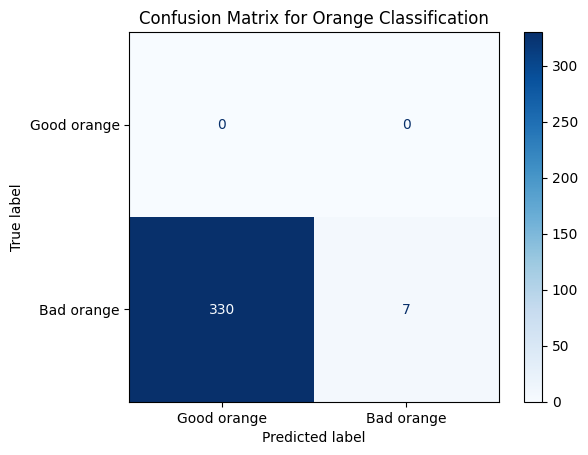

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the true labels (all "Bad apple")
true_labels = ["Bad orange"] * len(df_results)

# Extract the predicted labels from the DataFrame
predicted_labels = df_results['classification'].tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["Good orange", "Bad orange"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good orange", "Bad orange"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add a title
plt.title("Confusion Matrix for Orange Classification")
plt.show()

### Loading Testing dataset folder - Good Oranges

In [4]:
image_folder = '/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshoranges'

In [5]:
image_paths = [
    os.path.join(image_folder, filename)
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
]

In [6]:
results = []
for image_path in image_paths:
    task = {
        'role': 'user',
        'content': 'Based on all the context being provided and your knowledge, classify this image as whether the orange is a good orange or a bad orange. I want the response only to be good orange or bad orange (like a binary classification), Nothing more than that.',
        'images': [image_path]
    }
    messages = examples + [task]

    
    response = ollama.chat(
        model='', #Specify Model Name here as well
        messages=messages,
        keep_alive=10
    )

    
    classification = response['message']['content'].strip()
    results.append({'image': image_path, 'classification': classification})


for result in results:
    print(f"Image: {result['image']} -> Classification: {result['classification']}\n")

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshoranges/vertical_flip_Screen Shot 2018-06-12 at 11.50.28 PM.png -> Classification: Good orange

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshoranges/rotated_by_45_Screen Shot 2018-06-13 at 12.08.41 AM.png -> Classification: Good orange

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshoranges/rotated_by_75_Screen Shot 2018-06-12 at 11.50.41 PM.png -> Classification: The image shows an orange that appears to be in good condition. It has a smooth and even color, without any significant bruises, blemishes, or signs of rotting. This would classify it as a "good orange."

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshoranges/rotated_by_15_Screen Shot 2018-06-13 at 12.04.01 AM.png -> Classification: Good 

In [7]:
df_results = pd.DataFrame(results)

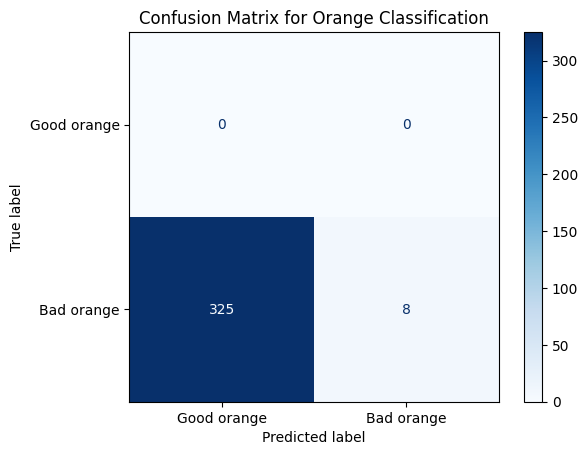

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the true labels (all "Bad apple")
true_labels = ["Bad orange"] * len(df_results)

# Extract the predicted labels from the DataFrame
predicted_labels = df_results['classification'].tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["Good orange", "Bad orange"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good orange", "Bad orange"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add a title
plt.title("Confusion Matrix for Orange Classification")
plt.show()

# For Bananas

### Few Shot Examples for providing context to the model

In [6]:
examples = [
    {
        'role': 'user',
        'content': 'Bad banana',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenbanana/rotated_by_15_Screen Shot 2018-06-12 at 8.49.15 PM.png']
    },

    {
        'role': 'user',
        'content': 'Bad banana',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenbanana/rotated_by_15_Screen Shot 2018-06-12 at 8.51.21 PM.png']
    },
    
    {
        'role': 'user',
        'content': 'Good banana',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshbanana/rotated_by_15_Screen Shot 2018-06-12 at 9.39.58 PM.png']
    },


     {
        'role': 'user',
        'content': 'Good banana',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshbanana/rotated_by_15_Screen Shot 2018-06-12 at 9.43.53 PM.png']
    },
    

     {
        'role': 'user',
        'content': 'Bad banana',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenbanana/rotated_by_15_Screen Shot 2018-06-12 at 9.17.19 PM.png']
    },

    {
        'role': 'user',
        'content': 'Good banana',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshbanana/rotated_by_15_Screen Shot 2018-06-12 at 10.00.54 PM.png']
    },


    {
        'role': 'user',
        'content': 'Good banana',
        'images': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshbanana/rotated_by_30_Screen Shot 2018-06-12 at 9.40.49 PM.png']
    },


     {
        'role': 'user',
        'content': 'Good banana',
        'image': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/freshbanana/rotated_by_30_Screen Shot 2018-06-12 at 9.44.49 PM.png']
    },

    {
        'role': 'user',
        'content': 'Bad banana',
        'image': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenbanana/rotated_by_60_Screen Shot 2018-06-12 at 8.58.49 PM.png']
    },


    
    {
        'role': 'user',
        'content': 'Bad banana',
        'image': ['/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/train/rottenbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.17.33 PM.png']
    },
    
]

## Test for Classification

### Loading Testing dataset folder - Bad Bananas

In [7]:
image_folder = '/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenbanana'

In [8]:
image_paths = [
    os.path.join(image_folder, filename)
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
]

In [20]:
results = []
for image_path in image_paths:
    task = {
        'role': 'user',
        'content': 'Based on all the context being provided and your knowledge, classify this image as whether the banana is a good banana or a bad banana. I want the response only to be good banana or bad banana (like a binary classification), Nothing more than that. It is strict instructions that I want your output to be only good banana or bad banana',
        'images': [image_path]
    }
    messages = examples + [task]

    
    response = ollama.chat(
        model='', #Specify Model Name here as well
        messages=messages,
        keep_alive=10
    )

    
    classification = response['message']['content'].strip()
    results.append({'image': image_path, 'classification': classification})


for result in results:
    print(f"Image: {result['image']} -> Classification: {result['classification']}\n")

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenbanana/translation_Screen Shot 2018-06-12 at 9.27.56 PM.png -> Classification: Bad banana

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenbanana/Screen Shot 2018-06-12 at 9.10.20 PM.png -> Classification: Good banana

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenbanana/translation_Screen Shot 2018-06-12 at 9.16.47 PM.png -> Classification: Good banana

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/rottenbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.16.57 PM.png -> Classification: Based on the image, it appears to be a bad banana due to its overripe condition with brown spots and an irregular shape which are indicative of a poor quality fruit.

Image: /Users/advaith/Desktop/MSBA Related coursework

In [21]:
df_results = pd.DataFrame(results)

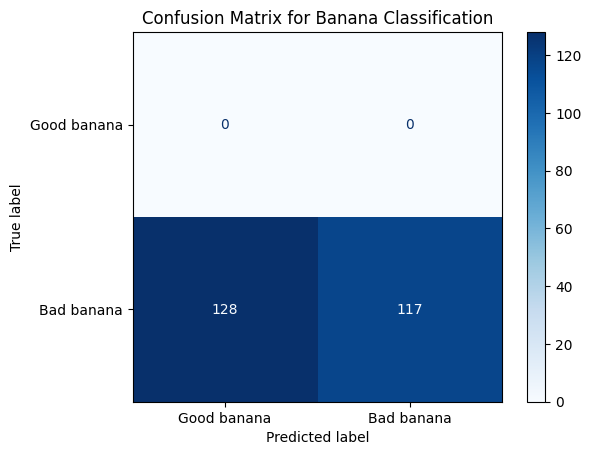

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the true labels (all "Bad banana")
true_labels = ["Bad banana"] * len(df_results)

# Extract the predicted labels from the DataFrame
predicted_labels = df_results['classification'].tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["Good banana", "Bad banana"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good banana", "Bad banana"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add a title
plt.title("Confusion Matrix for Banana Classification")
plt.show()

### Loading Testing dataset folder - Good Bananas

In [23]:
image_folder = '/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshbanana'

In [24]:
image_paths = [
    os.path.join(image_folder, filename)
    for filename in os.listdir(image_folder)
    if filename.lower().endswith((".jpg", ".jpeg", ".png"))
]

In [25]:
results = []
for image_path in image_paths:
    task = {
        'role': 'user',
        'content': 'Based on all the context being provided and your knowledge, classify this image as whether the banana is a good banana or a bad banana. I want the response only to be good banana or bad banana (like a binary classification), Nothing more than that. It is strict instructions that I want your output to be only good banana or bad banana',
        'images': [image_path]
    }
    messages = examples + [task]

    
    response = ollama.chat(
        model='', #Specify Model Name here as well
        messages=messages,
        keep_alive=10
    )

    
    classification = response['message']['content'].strip()
    results.append({'image': image_path, 'classification': classification})


for result in results:
    print(f"Image: {result['image']} -> Classification: {result['classification']}\n")

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshbanana/rotated_by_75_Screen Shot 2018-06-12 at 9.58.07 PM.png -> Classification: The image shows ripe bananas, which are typically considered "good" in terms of ripeness for consumption. Therefore, the classification here would be "Good banana."

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshbanana/rotated_by_60_Screen Shot 2018-06-12 at 9.46.55 PM.png -> Classification: Good banana

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshbanana/rotated_by_30_Screen Shot 2018-06-12 at 9.49.45 PM.png -> Classification: Good banana

Image: /Users/advaith/Desktop/MSBA Related coursework/Fall Term/Advanced ML/Final project/dataset/test/freshbanana/Screen Shot 2018-06-12 at 9.39.13 PM.png -> Classification: Good banana

Image: /Users/advaith/Desktop/MSBA Related coursework

In [26]:
df_results = pd.DataFrame(results)

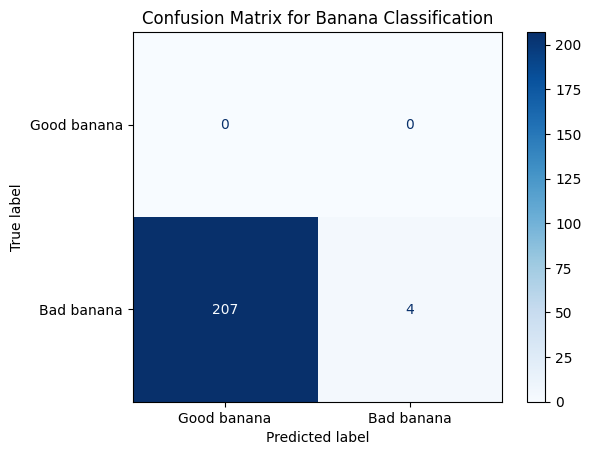

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the true labels (all "Bad banana")
true_labels = ["Bad banana"] * len(df_results)

# Extract the predicted labels from the DataFrame
predicted_labels = df_results['classification'].tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["Good banana", "Bad banana"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good banana", "Bad banana"])
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add a title
plt.title("Confusion Matrix for Banana Classification")
plt.show()